In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics as stat
from scipy import optimize
import scipy.optimize


#Amplituden 4mm

##Anregefrequenzen 

w0 = 2.14

w = (np.array([150,195,240,285,328,329,330,331,332,375,420,465,510,555])/1000)*2*np.pi

wnorm_4= w/w0


phimax = np.array([15,15,20.5,32,57.5,57.5,60,57.5,57.5,31,18.5,13,9,7.5])*np.pi/180
phimin = np.array([-13.5,-17,-21,-31,-57.5,-57.5,-50,-57.5,-57.5,-31.5,-19,-13,-9.5,-8])*np.pi/180
delta = (phimax+phimin)/2
A = phimax-delta

phi0 = A[0]

phinorm_4 = A/phi0



def test_func(x, a, b,c):
    return a/(((b**2-x**2)**2+4*c**2*x**2)**0.5)

params_4, params_covariance = optimize.curve_fit(test_func, wnorm_4, phinorm_4,
                                               p0=[1,1,1])



print(params_4)
print(delta*180/np.pi)

[0.726739   0.9866073  0.09215375]
[ 0.75 -1.   -0.25  0.5   0.    0.    5.    0.    0.   -0.25 -0.25  0.
 -0.25 -0.25]


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics as stat
from scipy import optimize
import scipy.optimize


#Amplituden 6mm

##Anregefrequenzen 


w = (np.array([150,195,240,295,320,330,333,335,339,340,385,430,475,520,570])/1000)*2*np.pi

wnorm_6= w/w0


phimax = np.array([14.5,16.5,20,29,34,35,36,36,34,32,25,15.5,11.5,8.25,6.5])*np.pi/180
phimin = np.array([-13,-15,-19,-29,-36,-35,-34,-34,-34,-32,-20,-16,-11.5,-8.25,-6])*np.pi/180
delta = (phimax+phimin)/2
A = phimax-delta

phi0 = A[0]

phinorm_6 = A/phi0

def test_func(x, a, b,c):
    return a/(((b**2-x**2)**2+4*c**2*x**2)**0.5)

params_6, params_covariance = optimize.curve_fit(test_func, wnorm_6, phinorm_6,
                                               p0=[1,1,1])


In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics as stat
from scipy import optimize
import scipy.optimize


#Amplituden 8mm

##Anregefrequenzen 


w = (np.array([150,195,240,285,295,300,303,305,309,330,375,420,465,510,555])/1000)*2*np.pi

wnorm_8 = w/w0


phimax = np.array([14,15,17,21,22,22,23,23,24,21,19,14.5,11,8,6.5])*np.pi/180
phimin = np.array([-12,-14.5,-17.5,-20.5,-22,-22,-23,-21,-21,-25,-18.5,-14,-10.5,-7.5,-6.25])*np.pi/180
delta = (phimax+phimin)/2
A = phimax-delta

phi0 = A[0]

phinorm_8 = A/phi0


def test_func(x, a, b,c):
    return a/(((b**2-x**2)**2+4*c**2*x**2)**0.5)

params_8, params_covariance = optimize.curve_fit(test_func, wnorm_8, phinorm_8,
                                               p0=[1,1,1])

[0.85740258 1.01339347 0.24842055]


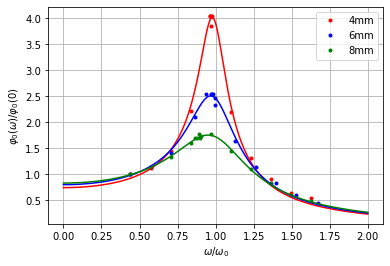

In [4]:
plt.figure()
plt.xlabel('$\omega/\omega_0$')
plt.ylabel(r'$\varphi_0(\omega)/\varphi_0(0)$')

x=np.arange(0,2,0.0001)
plt.plot(wnorm_4, phinorm_4,'r.' , label='4mm',linewidth = 10)
plt.plot(wnorm_6, phinorm_6,'b.', label='6mm')
plt.plot(wnorm_8, phinorm_8,'g.', label='8mm')

plt.plot(x,test_func(x, params_4[0], params_4[1], params_4[2]),'r')
plt.plot(x,test_func(x, params_6[0], params_6[1], params_6[2]),'b')
plt.plot(x,test_func(x, params_8[0], params_8[1], params_8[2]),'g')
plt.legend(loc='upper right')
plt.grid()

print(params_8)

plt.savefig("rescurve.png")

In [29]:
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics as stat
from scipy import optimize
import scipy.optimize





##Phasenverschiebung
##4mm

w0  = 2.14

sigw0 = 0.05

w1 = (np.array([150,195,240,285,328,329,330,331,332,375,420,465,510,555])/1000)*2*np.pi ##in hz


##Fehler Rad (Zeit)

sigr1 = np.array([0.5,0.5,0.5,0.5,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25])

##Fehler Motor 

sigm1 = np.array([0.25,0.25,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.05,0.05,0.05,0.05]) 

##Fehler normierte Frequenz

sigwn1 = sigw0*w1/w0**2



##Nulldurchgänge Motor -+
nm = np.array([52.65,55.75,49.5,62.41,42.2,48.1,53.85,44.8,41.65,47.5,54.15,31.91,38.8,40.92])



##Zugehörige Nulldurchgänge des Rades
nr = np.array([53,55.8,49.6,62.61,42.8,48.71,54.5,45.5,42.35,48.45,55.05,32.8,39.65,41.71])



dt1 = nr - nm

sigdt1 =  np.sqrt(sigr1**2 - sigm1**2)

dphi1 = w1*dt1

sigphi1 = sigdt1*w1/w0


        
def test_func(x, a):
    z = np.arctan(x*a/(1-x**2))
    for k in range(len(z)):
        if  z[k] > 0:
            z[k] = z[k]
        else:
            z[k] = z[k] + np.pi
    return z


para1, cova1 = optimize.curve_fit(test_func, w1/w0, dphi1, sigma = sigphi1,
                                  p0=[0])




In [30]:
##Phasenverschiebung
##6mm

w0 =2.14

w2 = (np.array([150,195,240,295,320,330,333,335,339,340,385,430,475,520,570])/1000)*2*np.pi 


##Nulldurchgänge Motor -+
nm = np.array([52.6,45.65,38.55,40.2,37,35.9,38.6,35.4,37.87,55.25,41.1,32.2,35.39,28.5,34.7])

##Zugehörige Nulldurchgänge des Rades
nr = np.array([53,45.9,38.78,40.6,37.6,36.55,39.2,36.1,38.57,55.94,41.9,33.05,36.25,29.3,35.4])


##Fehler Rad (Zeit)

sigr2 = np.array([0.5,0.5,0.5,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25])

##Fehler Motor 

sigm2 = np.array([0.25,0.25,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.05,0.05,0.05,0.05]) 


##Fehler normierte Frequenz

sigwn2 = sigw0*w2/w0**2



dt2 = nr - nm

dphi2 = w2*dt2


sigdt2 =  np.sqrt(sigr2**2 - sigm2**2)


sigphi2 = sigdt2*w2/w0 

     
para2, cova2 = optimize.curve_fit(test_func, w2/w0, dphi2, sigma=sigphi2,
                                  p0=[0])


In [31]:
##8mm

w0 =2.14

w3 = (np.array([150,195,240,285,295,300,303,305,309,330,375,420,465,510,555])/1000)*2*np.pi


##Nulldurchgänge Motor -+
nm = np.array([59.4,50.65,32.9,27.78,36.8,49.4,42.4,38.93,38.41,26.97,26.3,28.21,36.15,75.6,25.03])

##Zugehörige Nulldurchgänge des Rades
nr = np.array([59.7,51,33.3,28.2,37.3,49.9,42.9,39.41,38.97,27.61,27.08,29,36.95,76.3,25.71])


##Fehler Rad (Zeit)

sigr3 = np.array([0.5,0.5,0.5,0.25,0.25,0.5,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25])

##Fehler Motor 

sigm3 = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.05,0.05,0.05,0.05]) 

##Fehler normierte Frequenz

sigwn3 = sigw0*w3/w0**2



dt3 = nr - nm

dphi3 = w3*dt3


sigdt3 =  np.sqrt(sigr3**2 - sigm3**2)


sigphi3 = sigdt3*w3/w0

para3, cova3 = optimize.curve_fit(test_func, w3/w0, dphi3, sigma=sigphi3,
                                  p0=[0])



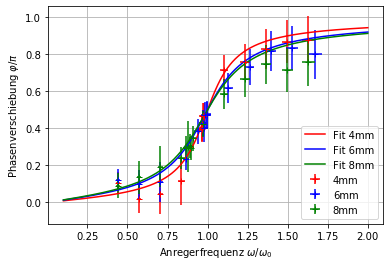

In [32]:
x = np.linspace(0.1,2,1000)
plt.figure()
plt.xlabel("Anregerfrequenz " '$\omega/\omega_0$')
plt.ylabel("Phasenverschiebung " r'$\varphi/\pi$')




plt.errorbar(w1/w0, dphi1/np.pi, xerr=sigwn1, yerr=sigphi1/np.pi, fmt = '+', ecolor = 'r', color = 'r',label = '4mm')


plt.errorbar(w2/w0, dphi2/np.pi, xerr=sigwn2, yerr=sigphi2/np.pi, fmt = '+', ecolor = 'b', color = 'b',label ='6mm')


plt.errorbar(w3/w0, dphi3/np.pi, xerr=sigwn3, yerr=sigphi3/np.pi, fmt = '+', ecolor = 'g', color = 'g',label ='8mm')


plt.plot(x,test_func(x, para1)/np.pi, 'r',label = 'Fit 4mm')
plt.plot(x,test_func(x, para2)/np.pi, 'b',label = 'Fit 6mm')
plt.plot(x,test_func(x, para3)/np.pi, 'g',label = 'Fit 8mm')
plt.grid()
plt.legend(loc='lower right')

plt.savefig("phase.png")


In [ ]:
y = np.arange(0,2,0.0001)


plt.plot(y,test_func(y, params_1[0]), 'r',label = 'Fit 4mm')
plt.plot(y,test_func(y, params_2[0]), 'b',label = 'Fit 6mm')
plt.plot(y,test_func(y, params_3[0]), 'g',label = 'Fit 8mm')
plt.grid()
plt.legend(loc='lower right')

